In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline

# Extracting molecular properties with Kudi

In this tutorial we will learn how to extract different molecular properties, like
bond distances and orbital energies along a reaction path using the Kudi library.
Kudi is an object oriented python library where all properties are 
extracted from the reaction path object, so we will start by initializing 
the object using the output file from single point computations along 
a reaction coordinate:

In [2]:
from kudi import Path
Mol = Path('output_sp.dat')

Obtaining the single point blocks....
Got it!
----------------------------------------------------------


The reaction we will study is a proton transfer reaction within the HSNO molecule. We can look at
the reaction if we extract the xyz Cartesian coordinates of each point from the output file
and than use molden to generate a animated gif.

In [3]:
Mol.saveXYZ(format_="molden")

Saving XYZ info in molden format
----------------------------------------------------------


In [4]:
#from IPython.display import HTML
#HTML('<img src="./movie.gif">')


Before proceeding to the extraction of the molecular properties let's plot the reaction energy which 
is easily done using the .energy() method. 

In [5]:
energy = Mol.energy()

"energy" is a dictionary containing both the information about the energy and reaction coordinate, so it
is fairly easy to plot using matplotlib directly.

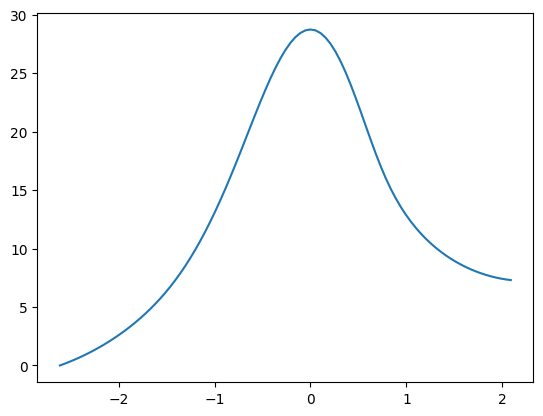

In [6]:
plt.plot(energy["Reaction Coordinate"],energy["Energy"]);

Or we can use the build in plotting function:

Generating the plot with the savePlot...
Saving the plot in ./figures as energy.svg
----------------------------------------------------------


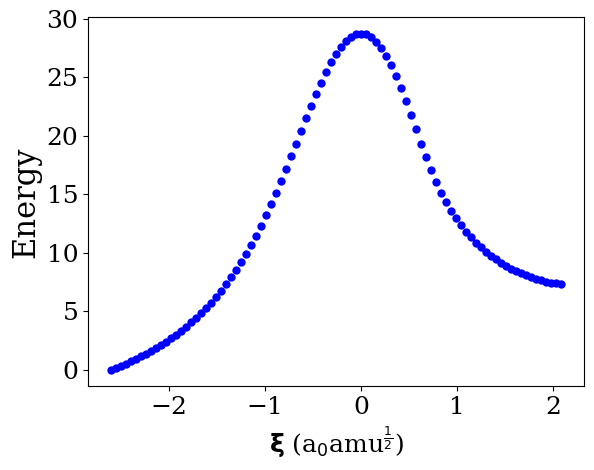

<Figure size 640x480 with 0 Axes>

In [7]:
Mol.savePlot('energy.svg',"Energy",**energy, show=True)

## Bond distances and angles

First we will start by plotting some key bond distances for this reaction. To do this, we need to know 
the labeling on each atom. This is provided when calling the distance method.

In [8]:
dis0 = Mol.distances()

----Distances---
H1-S2  2.3929364759711027
H1-N3  1.9072903676960151
H1-O4  0.9986025005461382
S2-H1  2.3929364759711027
S2-N3  1.6043161915548318
S2-O4  2.5032551529622387
N3-H1  1.9072903676960151
N3-S2  1.6043161915548318
N3-O4  1.3527079289857808
O4-H1  0.9986025005461382
O4-S2  2.5032551529622387
O4-N3  1.3527079289857808


The shown distances are the bond distance at the beginning of the reaction. Alternatively, the atom labels can be looked up in any molecular visualizer and the desired bond distances
to be plotted can be specified directly within the distance method. This is important for large molecules, where it 
becomes impossible to list all possible the bond distances and angles

In [9]:
dis1 = Mol.distances(['H1-O4','H1-S2','S2-N3','O4-N3'])

----Distances---
H1-O4  0.9986025005461382
H1-S2  2.3929364759711027
S2-N3  1.6043161915548318
O4-N3  1.3527079289857808


The same procedure can be used to obtain the relevant angles by the angles method

In [10]:
ang = Mol.angles(['O4-N3-S2'])

----Angles---
O4-N3-S2  115.41332522255024


Now we can plot the bond distances. First we will plot the distances and angles seperately. 

In [11]:
Mol.savePlotProps("bnd_distances1.png","Distance",["H1-O4","H1-S2"], **dis1)


Generating the plot with the savePlotProps...
Saving the plot in ./figures as bnd_distances1.png
----------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Generating the plot with the savePlotProps...
Saving the plot in ./figures as bnd_distances2.png
----------------------------------------------------------


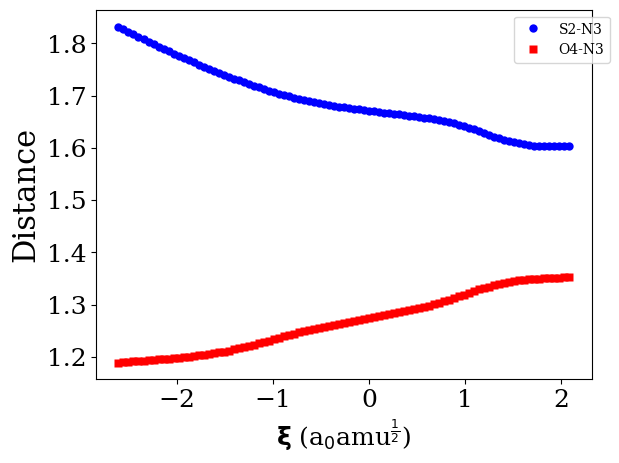

<Figure size 640x480 with 0 Axes>

In [14]:
Mol.savePlotProps("bnd_distances2.png","Distance",['S2-N3','O4-N3'], show=True, **dis1)

Generating the plot with the savePlotProps...
Saving the plot in ./figures as angle.png
----------------------------------------------------------


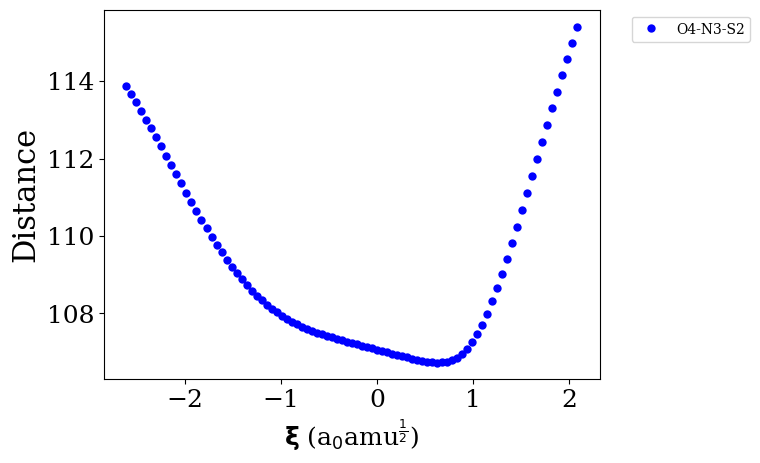

<Figure size 640x480 with 0 Axes>

In [15]:
Mol.savePlotProps("angle.png","Distance",['O4-N3-S2'], show=True, **ang)

If you do not want to use the build in plotting functions you can use the save method, to save
 the desired geometric parameters in a csv file. These can be
proceed with pandas or any other data analytics program. 

In [16]:
Mol.save('energy.dat',**energy)
Mol.save('dis.dat',**dis1)
Mol.save('ang.dat',**ang)

Saving the data in: energy.dat
----------------------------------------------------------
Saving the data in: dis.dat
----------------------------------------------------------
Saving the data in: ang.dat
----------------------------------------------------------


## Plotting orbital energies

Now that we know how the structural parameters change along the reaction coordinate, we proceed to 
analyze the change in the orbital energies for this proton transfer reaction. In order to do so 
we need to obtain the orbital energies using the 

In [17]:
orb = Mol.all_orbtitals()

homo_lumo = Mol.HOMO_LUMO()

The HOMO corresponds to orbital number: 16


The first methods extracts all orbital energies and saves them in a dictionary with orbital numbers as keys (0 -> lowest energy orbital). The HOMO_LUMO method only returns the HOMO and LUMO energies in a dictionary with "HOMO" and "LUMO" as keys. Now that we have the orbital energy data we can proceed to plot it. We use 
the same savePlotProps method as we did with the bond distances only now the object is orbital energies

Generating the plot with the savePlotProps...
Saving the plot in ./figures as orbitals1.png
----------------------------------------------------------


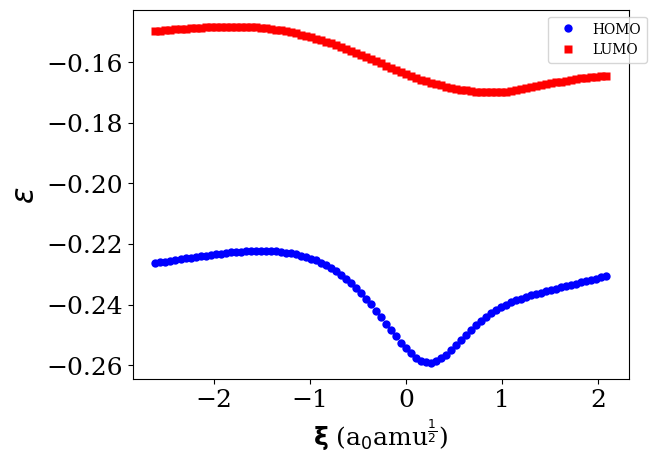

<Figure size 640x480 with 0 Axes>

In [18]:
Mol.savePlotProps("orbitals1.png","$\epsilon$",["HOMO","LUMO"], show=True, **homo_lumo)

Here is the plot of the HOMO and HOMO-1, using different bullets.

Generating the plot with the savePlotProps...
Saving the plot in ./figures as orbitals1.png
----------------------------------------------------------


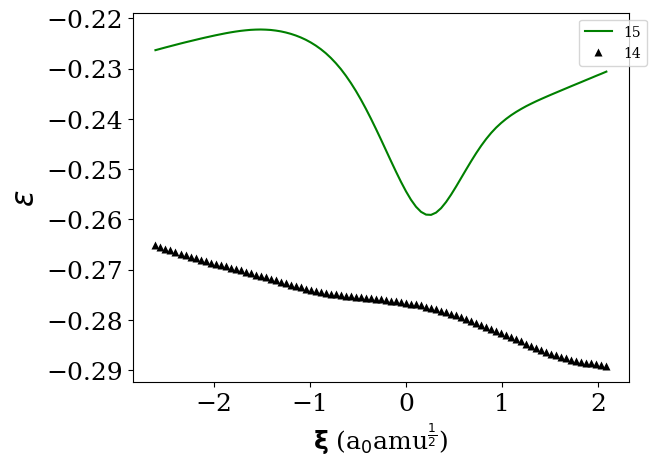

<Figure size 640x480 with 0 Axes>

In [19]:
Mol.savePlotProps("orbitals1.png","$\epsilon$",['15','14'], bullets=['g-','k^'], show=True, **orb)

## Combining different porperties

To finish this tutorial we will use a very neat method that allows to compare two different properties on different 
scales. To do that let's first extract two additional porperties, the Wiberg bond orders and the natural charges:

In [20]:
charges = Mol.natCharges(['O4'])
bnd_ord = Mol.bondOrders(['O4-N3'])

------------Charges-------------
O4
----------- Bonds ----------
O4-N3


First we verify if we extracted the bond order and charges correctly:

Generating the plot with the savePlotProps...
Saving the plot in ./figures as charges.svg
----------------------------------------------------------


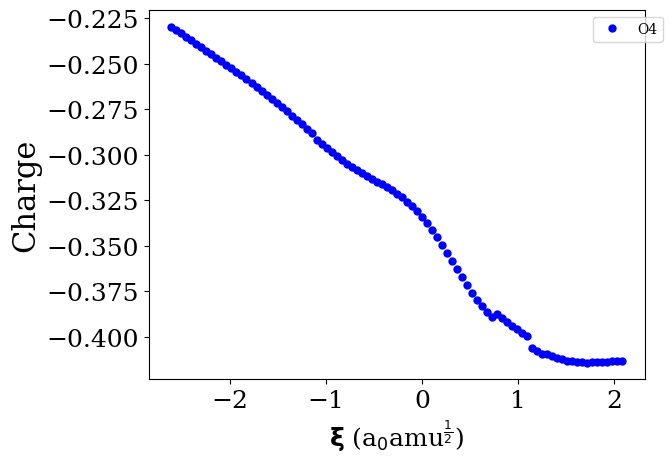

Generating the plot with the savePlotProps...
Saving the plot in ./figures as bnd.svg
----------------------------------------------------------


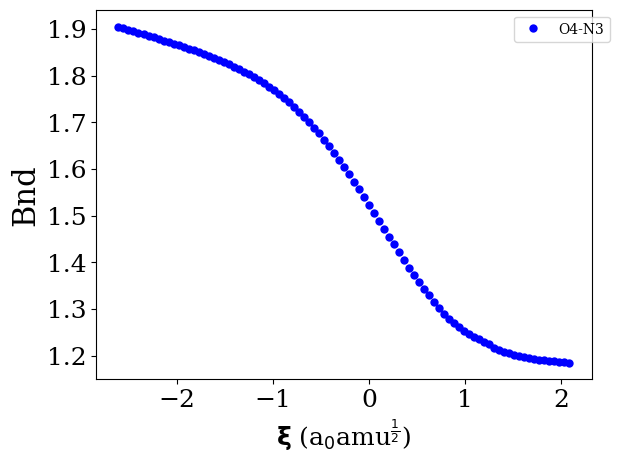

<Figure size 640x480 with 0 Axes>

In [21]:
Mol.savePlotProps("charges.svg", "Charge", ['O4'], show=True, **charges)
Mol.savePlotProps("bnd.svg", "Bnd", ['O4-N3'], show=True, **bnd_ord)

Generationg the plot with the savePlotDual...
Generating the plot....
Saving the plot in ./figures as multi.svg
----------------------------------------------------------


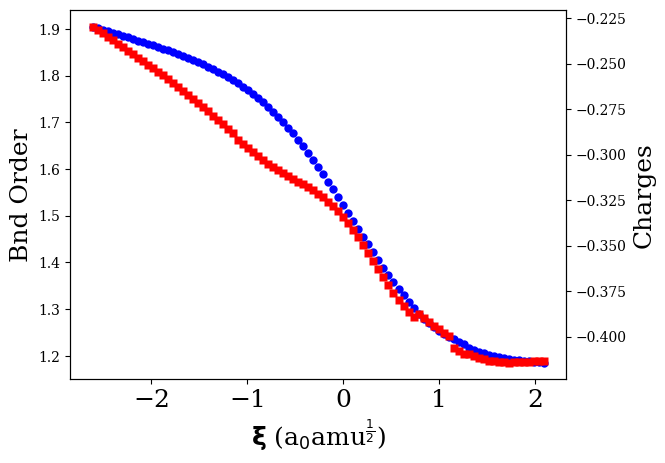

<Figure size 640x480 with 0 Axes>

In [22]:

#Mol.savePlotDual("multi.svg", "Bnd Order", "Charges", dictos=[bnd_ord,charges], limit_list1 = [1.0,2.0],limit_list2 = [-0.4,-0.2], Show = True)
Mol.savePlotDual("multi.svg", "Bnd Order", "Charges", dictos=[bnd_ord,charges],  show = True)

#### Have fun exploring chemical reactions with Kudi, and let me know of any bugs that you might encounter.